In [8]:
#####
# for running on Colab
####
#from google.colab import drive
#drive.mount("/content/drive")
# %cd drive/MyDrive/BullingerDigitalLMFootnotes/git_repo

In [9]:
#!ls

### Number of FNs based on the parsing script
- There are 64'764 content footnotes. Those are all counted in the letter_df. <br>
- Of these 63'798 have a sentence as a parent element. The others are FNs in the FNs or the Regest, title and so on.

In [10]:

from parse_bullinger import *
import json
from bullinger_plots import *
import os

DATA_DIR = "../../data"
with open(os.path.join(DATA_DIR, "id_to_edition_map.json"), "r", encoding="utf-8") as injson:
    id_to_edition = json.load(injson)


In [11]:

letter_df = pd.read_csv("letter_df.csv")

letter_df.head()

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
0,0,10013,20,275,112,26,0.407273
1,1,10014,1,58,16,5,0.275862
2,2,10015,1,188,0,0,0.000000
3,3,10016,1,9,1,1,0.111111
4,4,10017,1,80,16,8,0.200000


Note: There are 211 Letters with no content footnotes, this is not a problem, most of them are published in other editions or something...

In [12]:
letter_df['cont_footnote_count'].value_counts().get(0)


211

## Some Stats

some letters have a crazy amount of footnotes:

<Axes: >

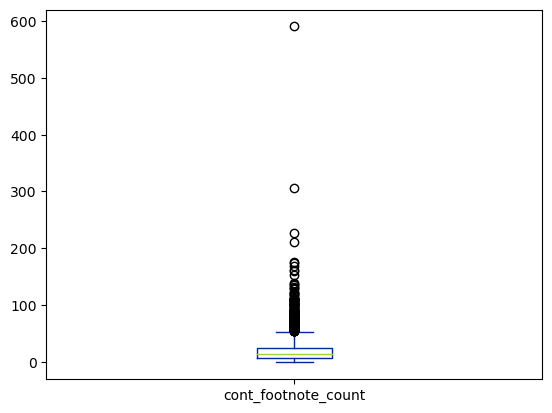

In [13]:
#
letter_df["cont_footnote_count"].plot.box()

a bit less crazy, when compared to the length of the letters

<Axes: >

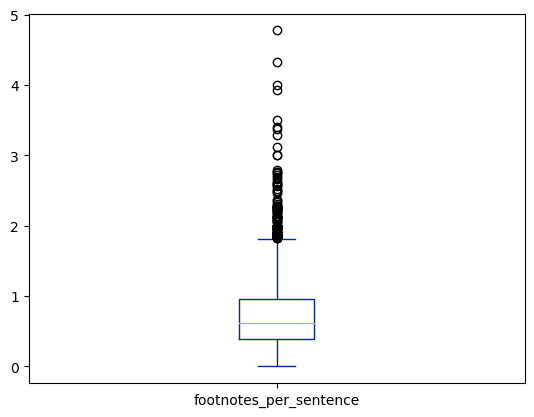

In [14]:
letter_df["footnotes_per_sentence"].plot.box()

The letter with 600 Footnotes is also a very long one. One letter has almost 5 content footnotes per sentence!!!

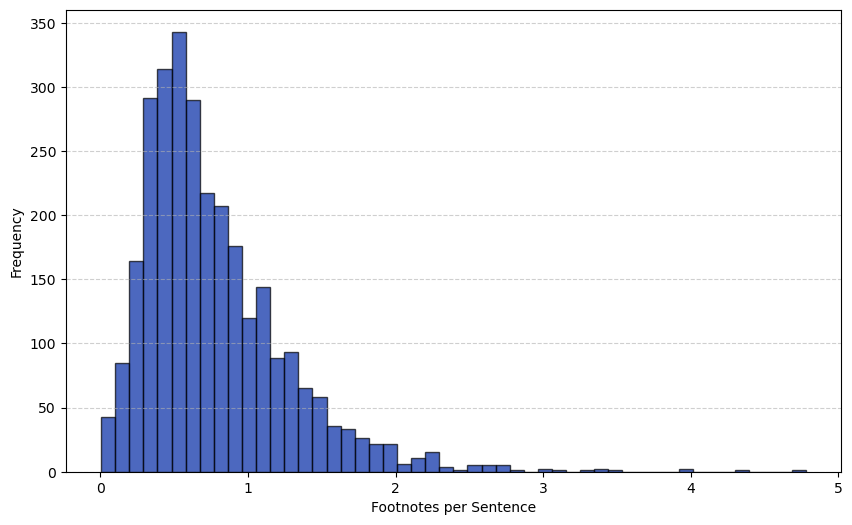

In [15]:


plot_series = letter_df["footnotes_per_sentence"]
plot_series = plot_series[plot_series>0]
plt.figure(figsize=(10, 6))
plt.hist(plot_series, bins=50, edgecolor='black', alpha=0.7)
plt.title('')
plt.xlabel('Footnotes per Sentence')
plt.ylabel('Frequency')
plt.grid(True, axis="y", linestyle='--', alpha=0.6)


# Show the plot
if False:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnsPerSentence.pdf"  # Camel casing for latex...
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [16]:
plot_series.quantile(0.75)

1.0

In [17]:

letter_df[letter_df["cont_footnote_count"]==letter_df["cont_footnote_count"].max()]

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
30,30,10053,1,340,590,15,1.735294


In [18]:
letter_df[letter_df["footnotes_per_sentence"]==letter_df["footnotes_per_sentence"].max()]

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
2437,2437,12477,16,9,43,2,4.777778


Editions seem to have similar amount of footnotes per sentence

<Axes: title={'center': 'footnotes_per_sentence'}, xlabel='edition'>

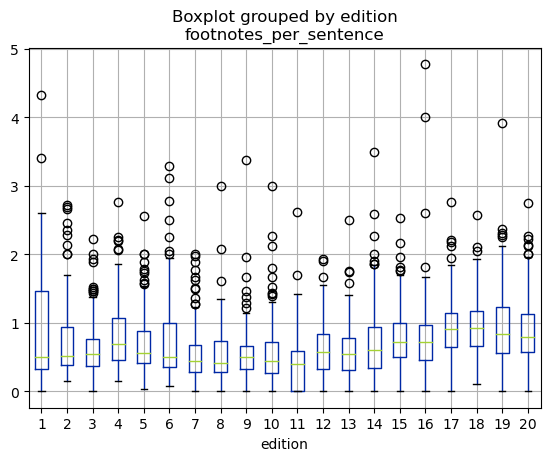

In [19]:
letter_df.boxplot(column="footnotes_per_sentence", by="edition")

### Filtering outlier letters

Defining outliers as bigger than Q3+1.5*IQR

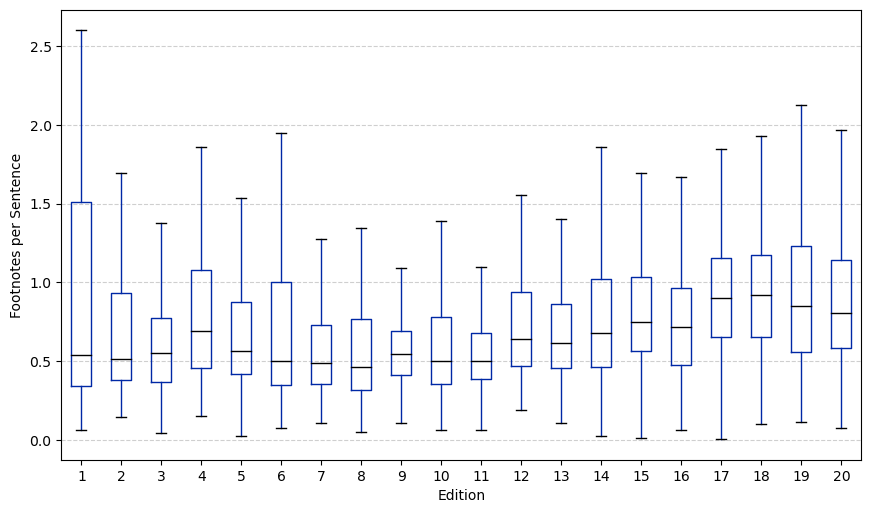

In [20]:

fig = plot_fn_per_sent_by_edition(letter_df)
# Save the figure with the desired format and dpi
# fig.savefig("../plots/fns_per_sentence_by_edition.svg", dpi=300, bbox_inches='tight', format='svg')


Filtering keeps more than 95% of the data :D

In [21]:
from filtering import filter_df
letter_filtered_df = filter_df(letter_df, "footnotes_per_sentence", by="edition")
print('Total number of letters:', letter_df.shape[0])
print('Number of letters in filtered df:', letter_filtered_df.shape[0])
print('percentage:', letter_filtered_df.shape[0]/letter_df.shape[0])

Total number of letters: 3113
Number of letters in filtered df: 2993
percentage: 0.9614519755862512


In [22]:
3113-2993

120

The maximum is now 2.6 footnotes per sentence

In [23]:
letter_filtered_df[letter_df["footnotes_per_sentence"]==letter_filtered_df["footnotes_per_sentence"].max()]

/tmp/ipykernel_2080/3801324187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  letter_filtered_df[letter_df["footnotes_per_sentence"]==letter_filtered_df["footnotes_per_sentence"].max()]


,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
49,49,10072,1,10,26,1,2.6


## Footnote DF

In [24]:
pd.set_option('display.max_colwidth', None)  # show whole text in the cells
footnote_df = pd.read_csv("footnote_df.csv")

footnote_df.head()

,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_footnote,text_sentence,len_footnote,pos_footnote,label
0,10013,20,3,2,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""2"" xml:lang=""la"" type=""auto"">Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli<note xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note> ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?</s>","Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.","Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3 ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?",33,10,self_ref
1,10013,20,4,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites<note xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note> ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",22,12,misc
2,10013,20,5,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites<note xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note> ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",2,16,lex
3,10013,20,6,4,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn6"" type=""footnote"" n=""6"">Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. <bibl>HBBibl</bibl> I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. <bibl>HBD</b

In [25]:
footnote_df["label"].unique()

array(['self_ref', 'misc', 'lex', 'bibl', 'short', 'inner_ref', 'missing',
       'lex_dict'], dtype=object)

In [26]:
# to view in the dataviewer debug this cell
test_df = footnote_df[footnote_df.label == "bible"]
pass

Note: I did make a new classification, allowing for multiple labels per footnote and including matching bible quotes. The ammount of overlap is small, only 3\% have more than one label and the general trends stay the same. Since I already relied on these labels to sample train/dev/test I will leave it like this. The df is called `footnote_df_new_classification.csv`, exchange it above to see the figures.

In [2]:
footnote_df_new_classification = pd.read_csv("footnote_df_new_classification.csv")
counter = {}
for label in footnote_df_new_classification["label"]:
    label_list = label.split(", ")
    if len(label_list) in counter:
        counter[len(label_list)] += 1
    else:
        counter[len(label_list)] = 1
total = sum([v for v in counter.values()])
percentages = {k: v/total*100 for k, v in counter.items()}
print("percentage of number of labels:")
percentages

percentage of number of labels:


{1: 96.91212890686228, 2: 3.087871093137716}

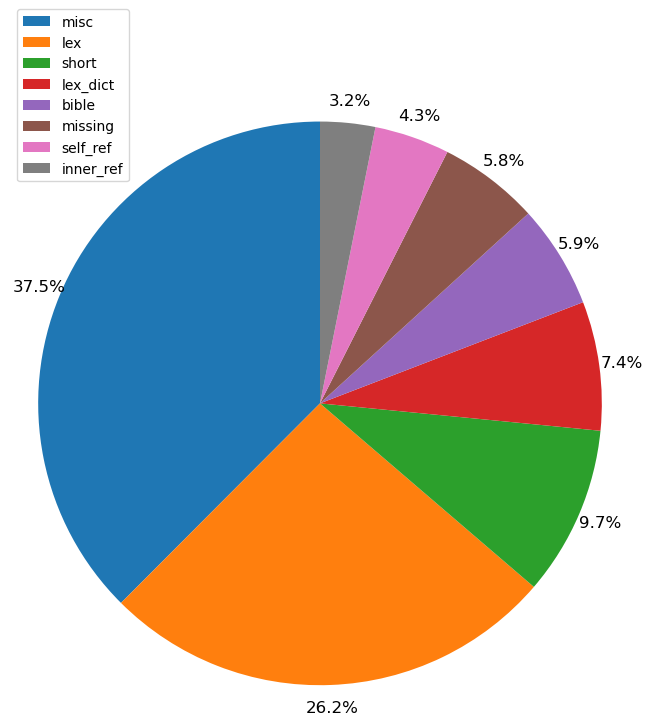

In [28]:
fig, label_colors = plot_label_pie_chart(footnote_df_new_classification)
if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "distrOfLabels.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [29]:
labels_frequent = [ "lex_dict", "short", "lex", "misc"]
labels_infrequent = ["inner_ref", "self_ref", "missing", "bible"]

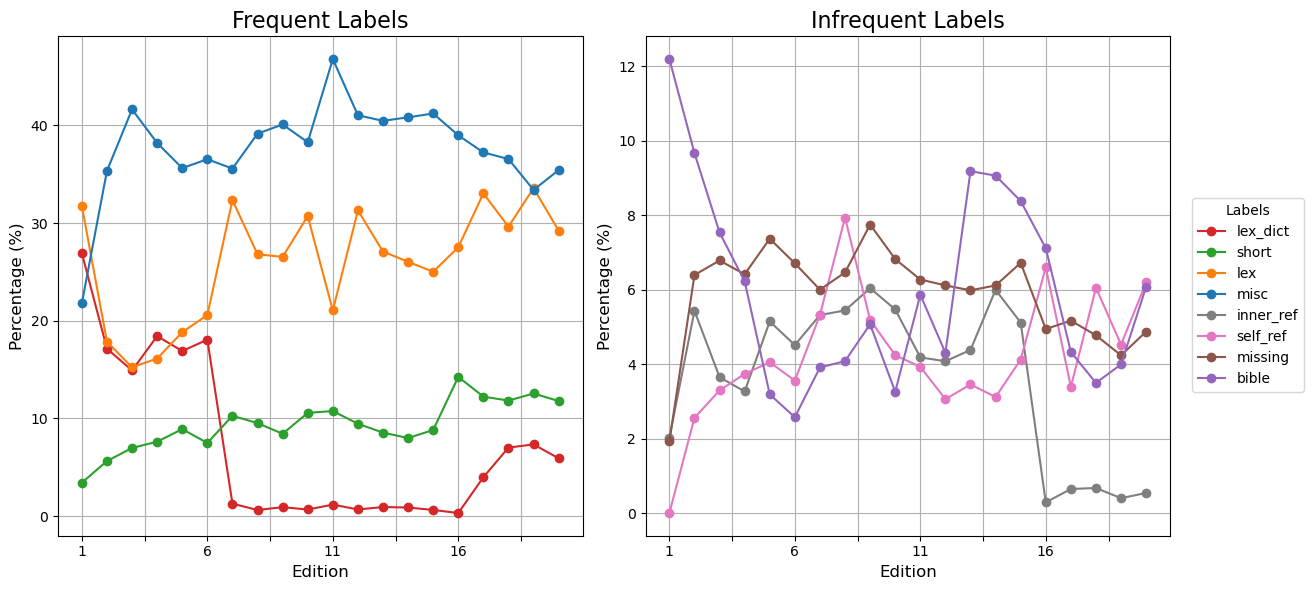

In [30]:
fig = plot_combined_label_trends(footnote_df_new_classification, label_colors, labels_frequent, labels_infrequent)
if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "distrOfLabelsByEdidion.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

Some footnotes are crazy long...

<Axes: >

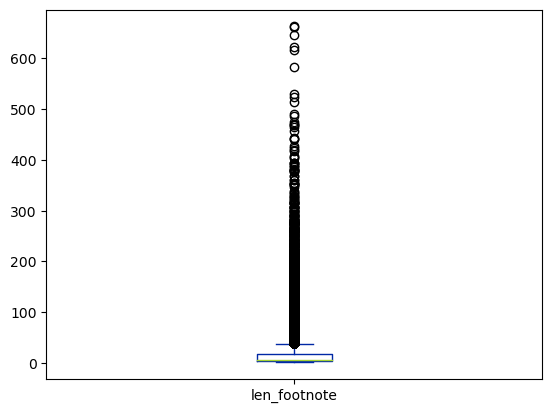

In [31]:
footnote_df["len_footnote"].plot.box()

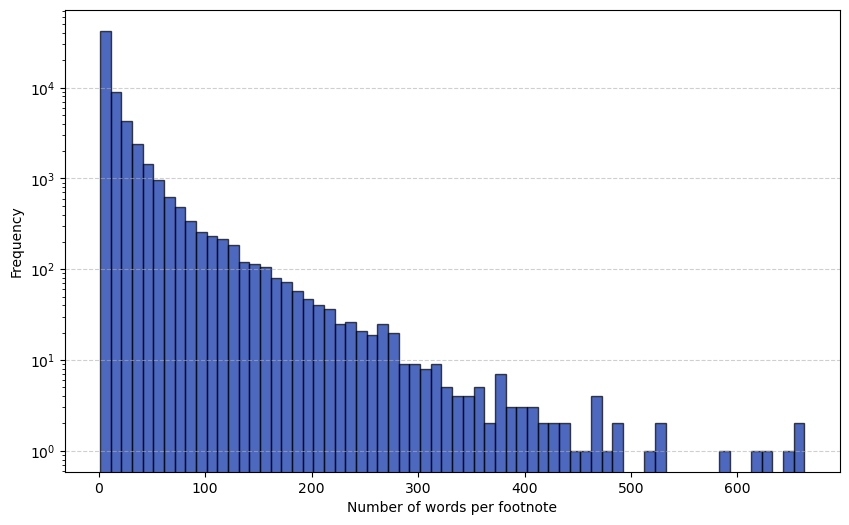

In [32]:


plot_series = footnote_df["len_footnote"]
# ensure bin width of 10
num_bins = (footnote_df["len_footnote"].max()-footnote_df["len_footnote"].min()) // 10

plt.figure(figsize=(10, 6))
plt.hist(plot_series, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('')
plt.xlabel('Number of words per footnote')
plt.ylabel('Frequency')
plt.yscale("log")
plt.grid(True, axis="y", linestyle='--', alpha=0.6)


# Show the plot
if False:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnLength.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [33]:
plot_series.quantile(0.93)

49.0

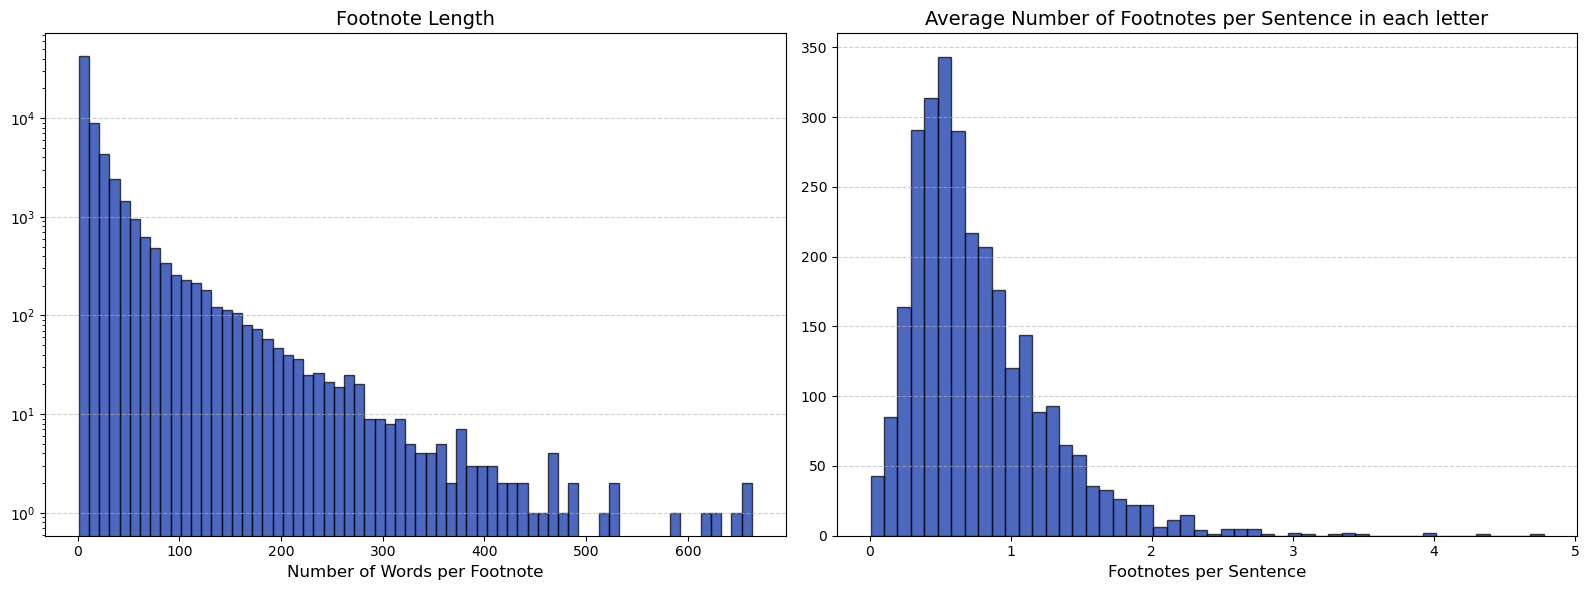

In [34]:
fig = plot_fn_len_and_density(footnote_df, letter_df)
# Show the plot
if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnFrequencies.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [35]:
import numpy as np
np.histogram(footnote_df["len_footnote"], bins=50)

(array([45876,  8447,  3638,  1858,  1139,   664,   439,   324,   297,
          239,   152,   141,   116,    90,    64,    52,    44,    35,
           25,    36,    22,    16,     9,    13,     7,     4,     7,
            4,     7,     6,     3,     3,     1,     3,     2,     4,
            1,     1,     1,     2,     0,     0,     0,     1,     0,
            0,     2,     0,     1,     2]),
 array([  1.  ,  14.24,  27.48,  40.72,  53.96,  67.2 ,  80.44,  93.68,
        106.92, 120.16, 133.4 , 146.64, 159.88, 173.12, 186.36, 199.6 ,
        212.84, 226.08, 239.32, 252.56, 265.8 , 279.04, 292.28, 305.52,
        318.76, 332.  , 345.24, 358.48, 371.72, 384.96, 398.2 , 411.44,
        424.68, 437.92, 451.16, 464.4 , 477.64, 490.88, 504.12, 517.36,
        530.6 , 543.84, 557.08, 570.32, 583.56, 596.8 , 610.04, 623.28,
        636.52, 649.76, 663.  ]))

this footnote is a small biography...

In [36]:
#
# footnote_df[footnote_df["len_footnote"]==footnote_df["len_footnote"].max()]

long footnotes exist across editions

<Axes: title={'center': 'len_footnote'}, xlabel='edition'>

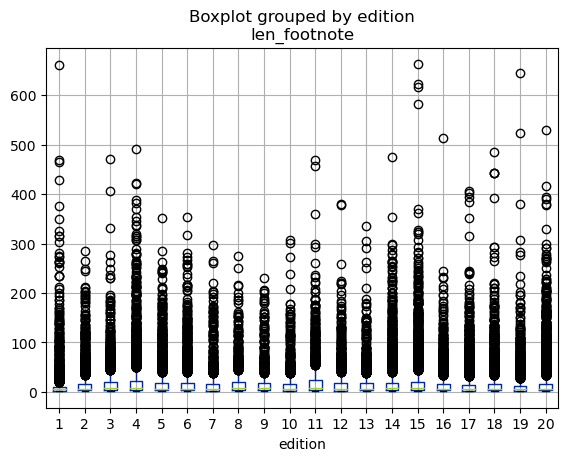

In [37]:
#
footnote_df.boxplot(column="len_footnote", by="edition")

We filter as with the letters

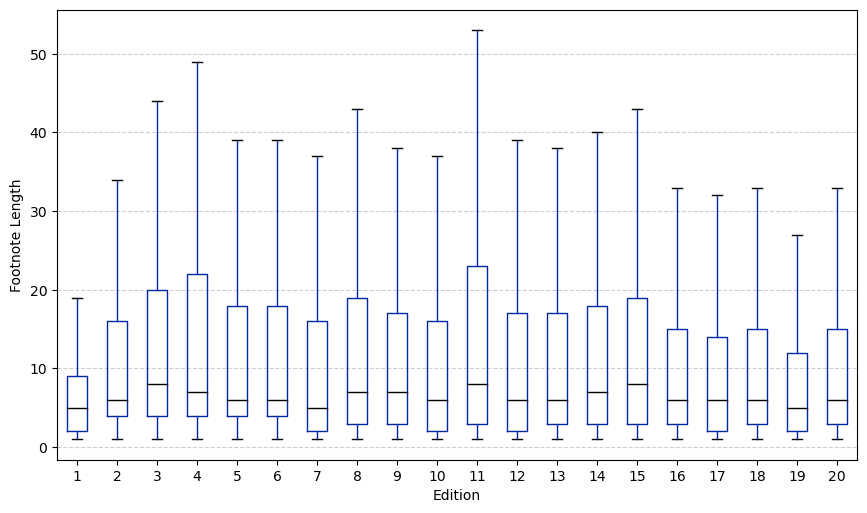

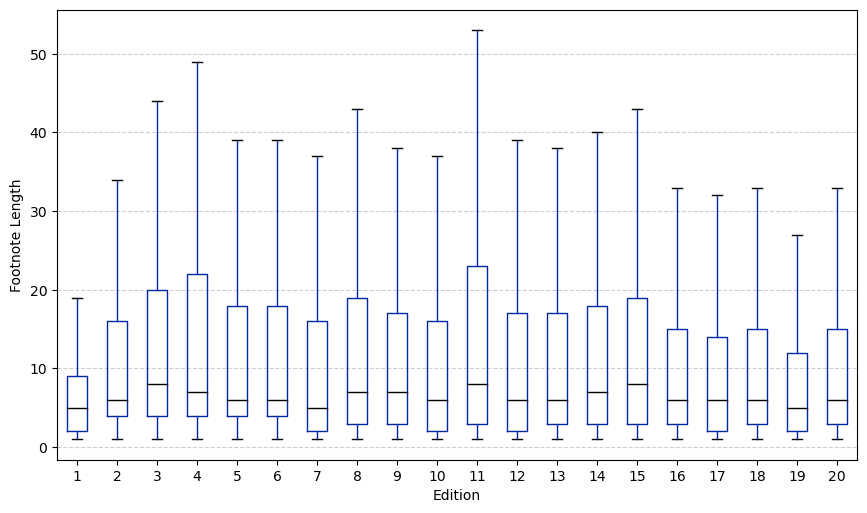

In [38]:

plot_footnote_length_by_edition(footnote_df)

# Save the figure with the desired format and dpi
# fig.savefig("../plots/footnote_length_by_edition.svg", dpi=300, bbox_inches='tight', format='svg')



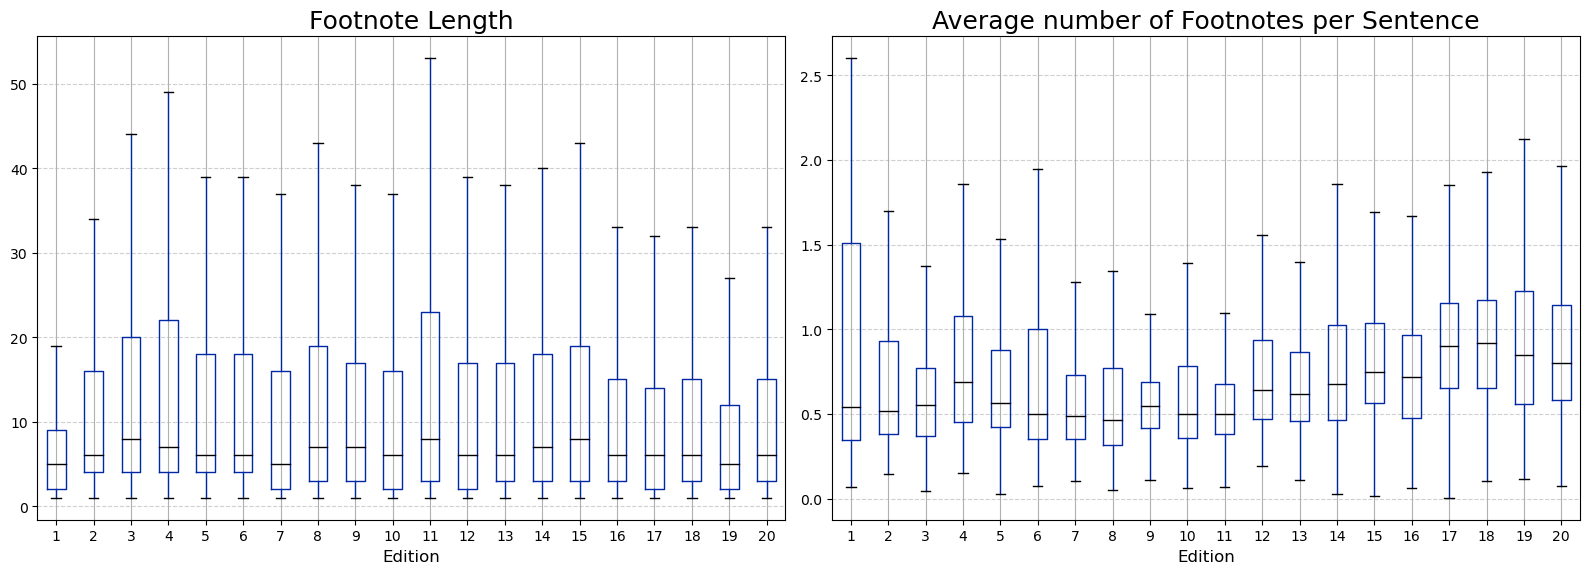

In [39]:
fig = plot_combined_footnote_and_sentence(footnote_df, letter_df)
if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnDensityAndLengthByEdition.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

We keep almost 90% of the data with the filtering. </br>
It does not make much of a difference in if we filter by edition or in general.
The upper limit when using toal IQR is 38, which is quite low for some editions

In [40]:
footnote_filtered_df_new = filter_df(footnote_df_new_classification, "len_footnote", by="edition")
print("total number of FNs:", footnote_df_new_classification.shape[0])
print("number of Footnotes without outliers: ", footnote_filtered_df_new.shape[0])
print("percentage: ", footnote_filtered_df_new.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers:  57352
percentage:  0.8989623499169253


In [41]:
footnote_filtered_df = filter_df(footnote_df, "len_footnote", by="edition")
print("total number of FNs:", footnote_df.shape[0])
print("number of Footnotes without outliers: ", footnote_filtered_df.shape[0])
print("percentage: ", footnote_filtered_df.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers:  57352
percentage:  0.8989623499169253


# Preparing Letters for FN Generation

## data preparation:

- General prep
    - Take only the filtered letters, remove unecessary metadata (done)
    - remove all editorial footnotes (done)
    - from the content footnotes only keep the filtered ones (done)
    - remove the FNs that are lexical or "missing". (done)
    - take only those that are left with at least 2 FNs. The first one will be the example. (done)
    - train/val/test split, stratified by editions (done)

- prepare for the model
    - depending on strategy, take out all remaining footnotes
    - this could also be done just before sending the letter. But it might take up time...
    - take out only one footnote (would work better if there are a lot of other footnotes)
    - format?

    

We take out "missing", "lex" and "lex_dict" as those are categories, we do not care about generating

In [42]:
# taking out footnotes based on the new classification
# we want to exclude all labels that contain these in the lables
exlude_label_regex = r"(missing|lex|lex_dict)"
exclude_label_list = list(footnote_df["label"].unique())
exclude_label_list = [el for el in exclude_label_list if re.search(exlude_label_regex, el)]
footnote_filtered_df_new = footnote_filtered_df_new[~footnote_filtered_df_new["label"].isin(exclude_label_list)]  # The '~makes the isin() negative
print("total number of FNs:", footnote_df.shape[0])
print("number of Footnotes without outliers and FNs of interes: ", footnote_filtered_df_new.shape[0])
print("percentage: ", footnote_filtered_df_new.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers and FNs of interes:  35655
percentage:  0.5588733189128186


In [43]:
footnote_filtered_df = footnote_filtered_df[~footnote_filtered_df["label"].isin(["missing", "lex", "lex_dict"])]  # The '~makes the isin() negative
print("total number of FNs:", footnote_df.shape[0])
print("number of Footnotes without outliers and FNs of interes: ", footnote_filtered_df.shape[0])
print("percentage: ", footnote_filtered_df.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers and FNs of interes:  35518
percentage:  0.5567259161729208


*Note* The new classification would result in a slightly different dataset, since I have already trained and measured model on my train/dev/test split, I cannot redo this

Applying the downsizing, and saving the files

In [44]:
from collections import defaultdict
# get a dictionary with lists of footnotes to keep for each letter
footnotes_to_keep_dict = defaultdict(list)
for i, row in footnote_filtered_df.iterrows():
    footnotes_to_keep_dict[row["letter_id"]].append(row["n_footnote"])

In [46]:

letters_dir = "../../bullinger_source_data/letters"
filtered_dir = "../../data/downsized_letters"

# get filepaths to all letters that we filtered
filtered_letter_ids = letter_filtered_df['letter_id']


for id in tqdm(filtered_letter_ids):
    filepath = os.path.join(letters_dir, f"{id}.xml")
    with open(filepath, "r", encoding="utf-8") as infile:
        tree = etree.parse(infile)
        root = tree.getroot()
        new_tree = etree.ElementTree(downsize_tei(root, footnotes_to_keep_dict[id]))
        ed_footnote_count, cont_footnote_count = count_fns_in_letter(new_tree.getroot())
        if ed_footnote_count != 0:
            print("problem!! ed_footnote_count != 0")
        elif cont_footnote_count > 1:
            filename = os.path.basename(filepath)
            new_tree.write(os.path.join(filtered_dir, filename), encoding="utf-8", pretty_print=True)

100%|██████████| 2993/2993 [00:45<00:00, 66.08it/s]


Analyzing the downsized letters


In [61]:
letter_downsized_df = make_letter_df("../../data/downsized_letters", id_to_edition)
letter_downsized_df.to_csv("../../data/letter_downsized_df.csv")
letter_downsized_df.tail()

  0%|          | 0/2592 [00:00<?, ?it/s]

100%|██████████| 2592/2592 [00:29<00:00, 87.92it/s] 


total content footnotes:  34013


,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count
2587,13147,20,17,7,0
2588,13148,20,66,33,0
2589,13149,20,43,16,0
2590,13151,20,19,7,0
2591,13152,20,12,3,0


In [64]:
# make_footnote_df("../../data/downsized_letters", "../../data/footnote_downsized_df_new.csv", id_to_edition)
# Total footnotes found: 34013
footnote_downsized_df = pd.read_csv("../../data/footnote_downsized_df.csv")

make new downsized df, with the new labeling

In [62]:
make_footnote_df("../../data/downsized_letters", "../../data/footnote_downsized_df_new.csv", id_to_edition)
# Total footnotes found: 34013
footnote_downsized_df_new = pd.read_csv("../../data/footnote_downsized_df_new.csv")

100%|██████████| 2592/2592 [00:23<00:00, 110.54it/s]


Total footnotes found: 34013


check that only the label column is different

In [65]:
def get_identical_columns(df1, df2):
  """
  Returns a list of column names that are entirely identical between two DataFrames.
  """
  identical_cols = []
  not_identical_cols = []
  for col in df1.columns:
    if df1[col].equals(df2[col]):
      identical_cols.append(col)
    else:
      not_identical_cols.append(col)
  print("identical cols: ", identical_cols)
  print("not identical cols: ", not_identical_cols)

get_identical_columns(footnote_downsized_df, footnote_downsized_df_new)

identical cols:  ['letter_id', 'edition', 'n_footnote', 'n_sentence', 'xml_footnote', 'xml_sentence', 'text_footnote', 'text_sentence', 'len_footnote', 'pos_footnote']
not identical cols:  ['label']


In [66]:
footnote_downsized_df["label"].unique()

array(['self_ref', 'misc', 'short', 'inner_ref', 'bibl'], dtype=object)

In [67]:
footnote_downsized_df_new["label"] = footnote_downsized_df_new["label"].apply(lambda x: x.replace(" ", "").split(","))
  # explode the labels
footnote_downsized_df_new = footnote_downsized_df_new.explode("label")
footnote_downsized_df_new["label"].unique()

array(['self_ref', 'misc', 'bible', 'short', 'inner_ref', 'missing',
       'lex'], dtype=object)

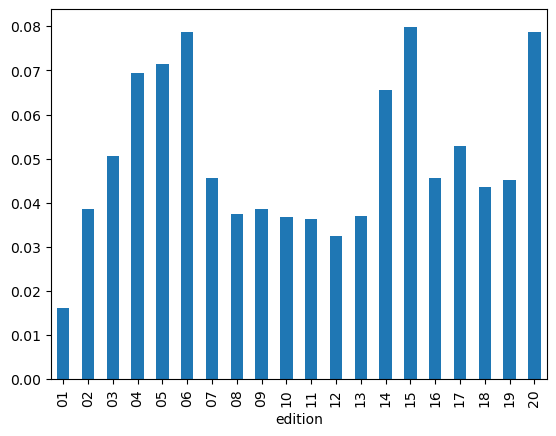

In [29]:
# number of letters per edition
def plot_edition_bar(df):
    df["edition"].value_counts(normalize=True).sort_index().plot(kind="bar")
plot_edition_bar(letter_downsized_df)

In [30]:
from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(letter_downsized_df, test_size=0.2, stratify=letter_downsized_df["edition"])
# test_df, val_df = train_test_split(test_df, test_size = 0.5, stratify=test_df["edition"])


In [6]:
import json
# strat_sample_dict = {
#    "train": list(train_df["letter_id"]),
#    "dev": list(val_df["letter_id"]),
#    "test": list(test_df["letter_id"])
#}
#with open("../../data/strat_sample.json", "w", encoding="utf-8") as outjson:
#    json.dump(strat_sample_dict, outjson)
with open("../../data/strat_sample.json", "r", encoding="utf-8") as injson:
    strat_sample_dict = json.load(injson)


In [5]:
for split in strat_sample_dict:
    print(f"Number of Samples in the {split}-set: {len(strat_sample_dict[split])}")

Number of Samples in the train-set: 2073
Number of Samples in the dev-set: 260
Number of Samples in the test-set: 259


# Prepare Human Feedback data

In [1]:
# variables to run this section independently
import json
import pandas as pd
with open("../../data/strat_sample.json", "r", encoding="utf-8") as injson:
    strat_sample_dict = json.load(injson)

footnote_df_new_classification = pd.read_csv("footnote_df_new_classification.csv")

In [2]:


from prepare_human_feedback import sample_from_test_set

    
    

sample_df = sample_from_test_set(footnote_df_new_classification, strat_sample_dict)
sample_df = sample_df.drop(columns=["edition", "xml_footnote", "xml_sentence", "len_footnote", "pos_footnote"])
# choose 40 footnotes, make sure equal amounts of languages and maybe labels

In [160]:
# write the fns for human feedback (jsonl files in the prompts)
if False: 
    human_feedback_prompts = []
    for _, row in sample_df.iterrows():
        human_feedback_prompts.append(f"{row.letter_id}_{row.n_footnote}.jsonl")
    with open("../../data/human_feetback_prompts.json", "w", encoding="utf-8") as outjson:
        json.dump(human_feedback_prompts, outjson)

In [3]:
from prepare_human_feedback import input_letter_head

# Todo: make this a real function, when the data is available
def input_model_answers(n_column):
    """For now just a placeholder function. 
    todo: get model responses, remove markup, insert to df"""
    global sample_df
    data = {}
    for i in range(1,4):
        data[f"model{i}"] = "Lorem ipsum dolor sit amet"
    
    for model in data:
        try: 
            sample_df.insert(n_column, model, data[model])
        except ValueError:
            sample_df = sample_df.drop(columns=[model])
            sample_df.insert(n_column, model, data[model])



input_model_answers(3)
input_letter_head(sample_df, 3)
sample_df.head()

,letter_id,n_footnote,n_sentence,title_letter,model3,model2,model1,text_footnote,text_sentence,label,lang
0,11755,99,160,Johannes Lening / Melsungen an Heinrich Bullin...,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,"Vgl. Lk 17, 10.","Dann sie seynt alle unnutze knecht,__99 haben ...",bible,de
1,13080,70,59,Ambrosius Blarer (Blaurer) / [Konstanz] an Hei...,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Vgl. oben Z. .,Mitt unsern predigen und kirchenuͤbungen stets...,inner_ref,de
2,10495,30,13,[Nikolaus Steiner] / [Zürich] an [Synode] / [Z...,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Steiner verlor seine Habe als Pfarrer in Bünze...,"Unnd ist allso, wie ich gesechen han, das ich ...",misc,de
3,12168,51,49,Gervasius Schuler (Scholasticus) / Memmingen a...,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,bhaußung und bholtzung: Wohnung und Holzversor...,"Senatus auxit salarium, ut annuatim ducentos f...",misc,de
4,10350,7,3,Oswald Myconius (Geißhüsler) / Basel an Heinri...,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Lorem ipsum dolor sit amet,Ein Kemten in der Steiermark ließ sich nicht n...,Harwiderumb schlecht imm Ferdinandus für ein h...,misc,de


In [6]:
from prepare_human_feedback import fill_excel_with_data
fill_excel_with_data(sample_df, '../evaluate/human_eval/eval_template.xlsx', '../evaluate/human_eval/evaluation_form_v1.xlsx')


In [5]:
from prepare_human_feedback import get_data_from_excel
get_data_from_excel("../evaluate/human_eval/evaluation_form_final_vers.xlsx")

/home/niko/anaconda3/lib/python3.11/site-packages/openpyxl/reader/excel.py:228: UserWarning: Data Validation extension is not supported and will be removed
  ws_parser.bind_all()


,letter_id,n_footnote,model,text_footnote,usefullness,style,correctness,fact_check
0,11755,99,model1,Lorem ipsum dolor sit amet,Die Fussnote ist relevant,None,None,Teilweise Fehlinformationen (mehr falsch als r...
1,11755,99,model3,Lorem ipsum dolor sit amet,None,None,None,None
2,11755,99,model2,Lorem ipsum dolor sit amet,None,None,None,None
3,11755,99,text_footnote,"Vgl. Lk 17, 10.",None,None,Keine Fehlinformationen,None
4,13080,70,model2,Lorem ipsum dolor sit amet,None,None,None,None
...,...,...,...,...,...,...,...,...
155,10348,39,model1,Lorem ipsum dolor sit amet,None,None,None,None
156,10560,13,model2,Lorem ipsum dolor sit amet,None,None,None,None
157,10560,13,model1,Lorem ipsum dolor sit amet,None,None,None,None
158,10560,13,model3,Lorem ipsum dolor sit amet,None,None,None,None


In [97]:
random.sample([1,2,3,4], 4)

[4, 1, 2, 3]